In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

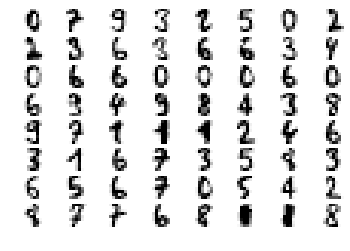

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.57116 stdev: 0.26587
Best fitness: 0.97774 - size: (2, 13) - species 5 - id 150
Average adjusted fitness: 0.459
Mean genetic distance 2.913, standard deviation 0.489
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 35.367 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.73426 stdev: 0.20668
Best fitness: 0.97774 - size: (2, 13) - species 5 - id 150
Average adjusted fitness: 0.624
Mean genetic distance 3.023, standard deviation 0.499
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 38.831 sec (37.099 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77084 stdev: 0.20742
Best fitness: 0.97774 - size: (2, 13) - species 25 - id 150
Average adjusted fitness: 0.656
Mean genetic distance 3.070, standard deviation 0.474
Population of 204 members in 33 species
Total exti

Population's average fitness: 0.81893 stdev: 0.19153
Best fitness: 0.98021 - size: (6, 22) - species 14 - id 2956
Average adjusted fitness: 0.699
Mean genetic distance 3.190, standard deviation 0.571
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 32.587 sec (35.426 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.82996 stdev: 0.19010
Best fitness: 0.99011 - size: (3, 15) - species 25 - id 3575
Average adjusted fitness: 0.645
Mean genetic distance 3.187, standard deviation 0.571
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 31.979 sec (34.617 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.82717 stdev: 0.18581
Best fitness: 0.99011 - size: (3, 15) - species 25 - id 3575
Average adjusted fitness: 0.724
Mean genetic distance 3.217, standard deviation 0.584
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 32.931 sec (33.972 average)

 

Population's average fitness: 0.85267 stdev: 0.17221
Best fitness: 0.99320 - size: (5, 20) - species 46 - id 5746
Average adjusted fitness: 0.748
Mean genetic distance 3.311, standard deviation 0.613
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 38.270 sec (38.160 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.82361 stdev: 0.20615
Best fitness: 0.99320 - size: (5, 20) - species 46 - id 5746
Average adjusted fitness: 0.719
Mean genetic distance 3.376, standard deviation 0.600
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 39.696 sec (38.393 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.83786 stdev: 0.19548
Best fitness: 0.99320 - size: (5, 20) - species 46 - id 5746
Average adjusted fitness: 0.735
Mean genetic distance 3.362, standard deviation 0.585
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 39.459 sec (38.500 average)

 

Population's average fitness: 0.87141 stdev: 0.16359
Best fitness: 0.99443 - size: (9, 23) - species 25 - id 8822
Average adjusted fitness: 0.768
Mean genetic distance 3.197, standard deviation 0.619
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 40.779 sec (40.110 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.87135 stdev: 0.15252
Best fitness: 0.99443 - size: (9, 23) - species 25 - id 8822
Average adjusted fitness: 0.768
Mean genetic distance 3.145, standard deviation 0.613
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 41.712 sec (40.242 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.86192 stdev: 0.18241
Best fitness: 0.99443 - size: (9, 23) - species 25 - id 8822
Average adjusted fitness: 0.763
Mean genetic distance 3.146, standard deviation 0.609
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 40.508 sec (40.072 average)

 

Population's average fitness: 0.87976 stdev: 0.17538
Best fitness: 0.99443 - size: (9, 23) - species 25 - id 8822
Average adjusted fitness: 0.777
Mean genetic distance 3.104, standard deviation 0.611
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 49.718 sec (47.923 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.88259 stdev: 0.16732
Best fitness: 0.99443 - size: (9, 23) - species 25 - id 8822
Average adjusted fitness: 0.825
Mean genetic distance 3.110, standard deviation 0.596
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 49.462 sec (48.086 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.90677 stdev: 0.13976
Best fitness: 0.99443 - size: (9, 23) - species 25 - id 8822
Average adjusted fitness: 0.863
Mean genetic distance 3.030, standard deviation 0.603
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 49.249 sec (48.287 average)

 

Population's average fitness: 0.90512 stdev: 0.13686
Best fitness: 0.99567 - size: (13, 29) - species 68 - id 16263
Average adjusted fitness: 0.738
Mean genetic distance 3.086, standard deviation 0.588
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 59.666 sec (54.880 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.90906 stdev: 0.13191
Best fitness: 0.99567 - size: (13, 29) - species 68 - id 16263
Average adjusted fitness: 0.784
Mean genetic distance 3.041, standard deviation 0.630
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 58.850 sec (55.561 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.90173 stdev: 0.15455
Best fitness: 0.99567 - size: (13, 29) - species 68 - id 16263
Average adjusted fitness: 0.780
Mean genetic distance 3.023, standard deviation 0.619
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 54.007 sec (55.671 ave

Population's average fitness: 0.89607 stdev: 0.15132
Best fitness: 0.99567 - size: (20, 48) - species 75 - id 20050
Average adjusted fitness: 0.793
Mean genetic distance 3.168, standard deviation 0.555
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 57.189 sec (53.564 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.92415 stdev: 0.12483
Best fitness: 0.99567 - size: (20, 48) - species 75 - id 20050
Average adjusted fitness: 0.825
Mean genetic distance 3.146, standard deviation 0.561
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 55.113 sec (53.893 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.90199 stdev: 0.17461
Best fitness: 0.99567 - size: (20, 48) - species 75 - id 20050
Average adjusted fitness: 0.822
Mean genetic distance 3.111, standard deviation 0.576
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 54.801 sec (54.271 ave

Population's average fitness: 0.83255 stdev: 0.18305
Best fitness: 0.93754 - size: (3, 14) - species 26 - id 1797
Average adjusted fitness: 0.730
Mean genetic distance 3.071, standard deviation 0.485
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 30.759 sec (31.602 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.81778 stdev: 0.19196
Best fitness: 0.93754 - size: (3, 14) - species 26 - id 1797
Average adjusted fitness: 0.713
Mean genetic distance 3.076, standard deviation 0.490
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 31.406 sec (31.606 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.83549 stdev: 0.15806
Best fitness: 0.94125 - size: (3, 13) - species 26 - id 2939
Average adjusted fitness: 0.729
Mean genetic distance 3.089, standard deviation 0.499
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 33.075 sec (31.677 average)

 

Population's average fitness: 0.79309 stdev: 0.20196
Best fitness: 0.94496 - size: (5, 16) - species 26 - id 5914
Average adjusted fitness: 0.692
Mean genetic distance 3.077, standard deviation 0.564
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 34.341 sec (33.898 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.82173 stdev: 0.16656
Best fitness: 0.94496 - size: (5, 16) - species 26 - id 5914
Average adjusted fitness: 0.717
Mean genetic distance 3.080, standard deviation 0.583
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 34.681 sec (33.980 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.81335 stdev: 0.18223
Best fitness: 0.94496 - size: (5, 16) - species 26 - id 5914
Average adjusted fitness: 0.715
Mean genetic distance 3.074, standard deviation 0.560
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 36.341 sec (34.378 average)

 

Population's average fitness: 0.79204 stdev: 0.21177
Best fitness: 0.94743 - size: (6, 18) - species 26 - id 9844
Average adjusted fitness: 0.681
Mean genetic distance 3.224, standard deviation 0.603
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 37.593 sec (37.541 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.80871 stdev: 0.20386
Best fitness: 0.94743 - size: (6, 18) - species 26 - id 9844
Average adjusted fitness: 0.703
Mean genetic distance 3.217, standard deviation 0.582
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 37.149 sec (37.647 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.82109 stdev: 0.18270
Best fitness: 0.94743 - size: (5, 17) - species 26 - id 10327
Average adjusted fitness: 0.691
Mean genetic distance 3.288, standard deviation 0.583
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 37.147 sec (37.684 average)



Population's average fitness: 0.81464 stdev: 0.19871
Best fitness: 0.94743 - size: (5, 17) - species 26 - id 10327
Average adjusted fitness: 0.717
Mean genetic distance 3.083, standard deviation 0.569
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 32.894 sec (35.371 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.82302 stdev: 0.18083
Best fitness: 0.94743 - size: (5, 17) - species 26 - id 10327
Average adjusted fitness: 0.720
Mean genetic distance 3.089, standard deviation 0.565
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 32.785 sec (34.767 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.83737 stdev: 0.16182
Best fitness: 0.94743 - size: (5, 17) - species 26 - id 10327
Average adjusted fitness: 0.736
Mean genetic distance 3.091, standard deviation 0.569
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 32.910 sec (34.240 average)

Population's average fitness: 0.81868 stdev: 0.18755
Best fitness: 0.95053 - size: (5, 17) - species 26 - id 17163
Average adjusted fitness: 0.715
Mean genetic distance 3.061, standard deviation 0.583
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 32.652 sec (32.027 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.81979 stdev: 0.18702
Best fitness: 0.95053 - size: (5, 17) - species 26 - id 17163
Average adjusted fitness: 0.718
Mean genetic distance 3.053, standard deviation 0.575
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 32.599 sec (32.102 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.79542 stdev: 0.20566
Best fitness: 0.95053 - size: (5, 17) - species 26 - id 17163
Average adjusted fitness: 0.702
Mean genetic distance 3.074, standard deviation 0.587
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 31.904 sec (32.122 averag

Population's average fitness: 0.82872 stdev: 0.17205
Best fitness: 0.95053 - size: (5, 17) - species 26 - id 17163
Average adjusted fitness: 0.723
Mean genetic distance 2.940, standard deviation 0.504
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 27.834 sec (29.750 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.83885 stdev: 0.15149
Best fitness: 0.95053 - size: (5, 17) - species 26 - id 17163
Average adjusted fitness: 0.746
Mean genetic distance 2.916, standard deviation 0.506
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 28.362 sec (29.522 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.84594 stdev: 0.14498
Best fitness: 0.95053 - size: (5, 17) - species 26 - id 17163
Average adjusted fitness: 0.717
Mean genetic distance 2.914, standard deviation 0.505
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 27.729 sec (29.201 averag

Population's average fitness: 0.83204 stdev: 0.16408
Best fitness: 0.92703 - size: (4, 19) - species 27 - id 1926
Average adjusted fitness: 0.735
Mean genetic distance 3.100, standard deviation 0.497
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 22.009 sec (20.760 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.83987 stdev: 0.15923
Best fitness: 0.92703 - size: (4, 19) - species 27 - id 1926
Average adjusted fitness: 0.734
Mean genetic distance 3.104, standard deviation 0.505
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.490 sec (20.871 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.83707 stdev: 0.15719
Best fitness: 0.92703 - size: (4, 19) - species 27 - id 1926
Average adjusted fitness: 0.737
Mean genetic distance 3.109, standard deviation 0.507
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 21.579 sec (21.046 average)

 

Population's average fitness: 0.82431 stdev: 0.17588
Best fitness: 0.94867 - size: (8, 27) - species 4 - id 5506
Average adjusted fitness: 0.710
Mean genetic distance 3.150, standard deviation 0.566
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 24.092 sec (24.739 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.82435 stdev: 0.17611
Best fitness: 0.94867 - size: (8, 27) - species 4 - id 5506
Average adjusted fitness: 0.724
Mean genetic distance 3.161, standard deviation 0.561
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 25.439 sec (24.854 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.80956 stdev: 0.19915
Best fitness: 0.94867 - size: (8, 27) - species 4 - id 5506
Average adjusted fitness: 0.712
Mean genetic distance 3.154, standard deviation 0.562
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 25.764 sec (25.081 average)

 ***

Population's average fitness: 0.81655 stdev: 0.19496
Best fitness: 0.95053 - size: (11, 34) - species 4 - id 8973
Average adjusted fitness: 0.699
Mean genetic distance 3.288, standard deviation 0.555
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 28.503 sec (28.314 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.83006 stdev: 0.19469
Best fitness: 0.95053 - size: (11, 34) - species 4 - id 8973
Average adjusted fitness: 0.725
Mean genetic distance 3.287, standard deviation 0.561
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 28.607 sec (28.365 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.82815 stdev: 0.20224
Best fitness: 0.95053 - size: (11, 34) - species 4 - id 8973
Average adjusted fitness: 0.719
Mean genetic distance 3.270, standard deviation 0.562
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 28.766 sec (28.402 average)

 

Population's average fitness: 0.84067 stdev: 0.17639
Best fitness: 0.95424 - size: (11, 33) - species 4 - id 12735
Average adjusted fitness: 0.741
Mean genetic distance 3.301, standard deviation 0.562
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 30.808 sec (29.500 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.84807 stdev: 0.16810
Best fitness: 0.95424 - size: (11, 33) - species 4 - id 12735
Average adjusted fitness: 0.746
Mean genetic distance 3.289, standard deviation 0.581
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 29.407 sec (29.598 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.82815 stdev: 0.19034
Best fitness: 0.95424 - size: (11, 33) - species 4 - id 12735
Average adjusted fitness: 0.733
Mean genetic distance 3.295, standard deviation 0.597
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 29.624 sec (29.583 average)

Population's average fitness: 0.80397 stdev: 0.21725
Best fitness: 0.95424 - size: (11, 33) - species 4 - id 12735
Average adjusted fitness: 0.681
Mean genetic distance 3.344, standard deviation 0.591
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 33.974 sec (33.776 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.82195 stdev: 0.19293
Best fitness: 0.95424 - size: (14, 37) - species 61 - id 17751
Average adjusted fitness: 0.713
Mean genetic distance 3.353, standard deviation 0.580
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 35.535 sec (34.024 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.82680 stdev: 0.18519
Best fitness: 0.95424 - size: (14, 37) - species 61 - id 17751
Average adjusted fitness: 0.721
Mean genetic distance 3.312, standard deviation 0.612
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 34.934 sec (34.248 aver

Population's average fitness: 0.84565 stdev: 0.18014
Best fitness: 0.95795 - size: (17, 43) - species 61 - id 21338
Average adjusted fitness: 0.747
Mean genetic distance 3.201, standard deviation 0.617
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 39.282 sec (38.857 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.84113 stdev: 0.18379
Best fitness: 0.95795 - size: (17, 43) - species 61 - id 21338
Average adjusted fitness: 0.742
Mean genetic distance 3.220, standard deviation 0.610
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 38.558 sec (38.986 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.85115 stdev: 0.16130
Best fitness: 0.97032 - size: (21, 51) - species 81 - id 21912
Average adjusted fitness: 0.755
Mean genetic distance 3.267, standard deviation 0.629
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 39.955 sec (39.099 ave

Population's average fitness: 0.83202 stdev: 0.15158
Best fitness: 0.92950 - size: (3, 14) - species 26 - id 297
Average adjusted fitness: 0.730
Mean genetic distance 3.034, standard deviation 0.493
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.368 sec (19.075 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.83623 stdev: 0.15215
Best fitness: 0.92950 - size: (3, 14) - species 26 - id 297
Average adjusted fitness: 0.723
Mean genetic distance 3.037, standard deviation 0.494
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.341 sec (19.233 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.83919 stdev: 0.15430
Best fitness: 0.92950 - size: (3, 14) - species 26 - id 297
Average adjusted fitness: 0.737
Mean genetic distance 3.032, standard deviation 0.513
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 20.983 sec (19.428 average)

 *****

Population's average fitness: 0.80934 stdev: 0.20252
Best fitness: 0.97093 - size: (9, 28) - species 34 - id 3485
Average adjusted fitness: 0.711
Mean genetic distance 3.192, standard deviation 0.511
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 25.476 sec (23.576 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.82678 stdev: 0.18511
Best fitness: 0.97093 - size: (9, 28) - species 34 - id 3485
Average adjusted fitness: 0.721
Mean genetic distance 3.219, standard deviation 0.524
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 25.111 sec (23.857 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.83514 stdev: 0.17229
Best fitness: 0.97155 - size: (10, 29) - species 34 - id 5089
Average adjusted fitness: 0.694
Mean genetic distance 3.197, standard deviation 0.521
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 25.662 sec (24.163 average)



Population's average fitness: 0.82651 stdev: 0.18835
Best fitness: 0.97464 - size: (13, 39) - species 39 - id 7850
Average adjusted fitness: 0.724
Mean genetic distance 3.186, standard deviation 0.540
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 29.019 sec (28.890 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.82773 stdev: 0.19454
Best fitness: 0.97464 - size: (11, 33) - species 39 - id 8702
Average adjusted fitness: 0.722
Mean genetic distance 3.179, standard deviation 0.543
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 29.470 sec (29.056 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.83283 stdev: 0.18529
Best fitness: 0.97464 - size: (11, 33) - species 39 - id 8702
Average adjusted fitness: 0.759
Mean genetic distance 3.169, standard deviation 0.541
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 29.826 sec (29.235 average)

Population's average fitness: 0.81891 stdev: 0.19707
Best fitness: 0.97464 - size: (17, 46) - species 49 - id 9946
Average adjusted fitness: 0.706
Mean genetic distance 3.172, standard deviation 0.595
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 32.767 sec (32.228 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.80591 stdev: 0.20951
Best fitness: 0.97464 - size: (17, 46) - species 49 - id 9946
Average adjusted fitness: 0.690
Mean genetic distance 3.179, standard deviation 0.590
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 32.379 sec (32.289 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.83160 stdev: 0.17992
Best fitness: 0.97464 - size: (12, 33) - species 34 - id 12957
Average adjusted fitness: 0.724
Mean genetic distance 3.189, standard deviation 0.629
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 32.155 sec (32.294 average

Population's average fitness: 0.82138 stdev: 0.19993
Best fitness: 0.97835 - size: (14, 39) - species 57 - id 15562
Average adjusted fitness: 0.723
Mean genetic distance 3.264, standard deviation 0.597
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 34.997 sec (34.534 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.79173 stdev: 0.24114
Best fitness: 0.97835 - size: (14, 39) - species 57 - id 15562
Average adjusted fitness: 0.698
Mean genetic distance 3.287, standard deviation 0.585
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 36.053 sec (34.699 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.82723 stdev: 0.19927
Best fitness: 0.97835 - size: (14, 39) - species 57 - id 15562
Average adjusted fitness: 0.724
Mean genetic distance 3.284, standard deviation 0.586
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 35.937 sec (34.924 ave

Population's average fitness: 0.84759 stdev: 0.18201
Best fitness: 0.97835 - size: (14, 39) - species 57 - id 15562
Average adjusted fitness: 0.739
Mean genetic distance 3.182, standard deviation 0.640
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 38.398 sec (37.870 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.83160 stdev: 0.20915
Best fitness: 0.97835 - size: (16, 41) - species 34 - id 21097
Average adjusted fitness: 0.736
Mean genetic distance 3.210, standard deviation 0.629
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 38.319 sec (38.058 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.85571 stdev: 0.15797
Best fitness: 0.97835 - size: (16, 41) - species 34 - id 21097
Average adjusted fitness: 0.730
Mean genetic distance 3.203, standard deviation 0.612
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 38.906 sec (38.326 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.61425 stdev: 0.26301
Best fitness: 0.92517 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.519
Mean genetic distance 2.851, standard deviation 0.459
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 16.914 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.73318 stdev: 0.24337
Best fitness: 0.95238 - size: (2, 13) - species 17 - id 327
Average adjusted fitness: 0.635
Mean genetic distance 2.992, standard deviation 0.477
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 17.906 sec (17.410 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.79656 stdev: 0.18875
Best fitness: 0.95238 - size: (2, 13) - species 17 - id 327
Average adjusted fitness: 0.685
Mean genetic distance 3.042, standard deviation 0.492
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 18.579 sec (17.

Population's average fitness: 0.82144 stdev: 0.19570
Best fitness: 0.95733 - size: (9, 27) - species 32 - id 2354
Average adjusted fitness: 0.711
Mean genetic distance 3.192, standard deviation 0.553
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 25.248 sec (23.611 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.85020 stdev: 0.13798
Best fitness: 0.95733 - size: (9, 27) - species 32 - id 2354
Average adjusted fitness: 0.745
Mean genetic distance 3.138, standard deviation 0.568
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 25.128 sec (23.872 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.83036 stdev: 0.17636
Best fitness: 0.96289 - size: (10, 29) - species 32 - id 4034
Average adjusted fitness: 0.729
Mean genetic distance 3.180, standard deviation 0.579
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 25.158 sec (24.177 average)



Population's average fitness: 0.82695 stdev: 0.18105
Best fitness: 0.96722 - size: (10, 30) - species 22 - id 5889
Average adjusted fitness: 0.724
Mean genetic distance 3.252, standard deviation 0.595
Population of 193 members in 17 species
Total extinctions: 0
Generation time: 33.064 sec (30.628 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.83319 stdev: 0.18131
Best fitness: 0.96722 - size: (10, 30) - species 22 - id 5889
Average adjusted fitness: 0.733
Mean genetic distance 3.240, standard deviation 0.585
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 31.231 sec (30.839 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.79646 stdev: 0.22843
Best fitness: 0.97279 - size: (10, 31) - species 22 - id 7826
Average adjusted fitness: 0.692
Mean genetic distance 3.241, standard deviation 0.588
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 31.779 sec (31.084 average)

Population's average fitness: 0.84229 stdev: 0.18387
Best fitness: 0.97279 - size: (10, 31) - species 22 - id 7826
Average adjusted fitness: 0.744
Mean genetic distance 3.153, standard deviation 0.588
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 36.957 sec (37.199 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.85132 stdev: 0.18632
Best fitness: 0.97279 - size: (10, 31) - species 22 - id 7826
Average adjusted fitness: 0.758
Mean genetic distance 3.113, standard deviation 0.575
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 37.855 sec (37.273 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.84787 stdev: 0.16208
Best fitness: 0.97279 - size: (10, 31) - species 22 - id 7826
Average adjusted fitness: 0.741
Mean genetic distance 3.082, standard deviation 0.580
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 39.445 sec (37.608 average)

Population's average fitness: 0.83290 stdev: 0.18644
Best fitness: 0.97650 - size: (10, 32) - species 22 - id 13541
Average adjusted fitness: 0.733
Mean genetic distance 3.078, standard deviation 0.595
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 40.486 sec (41.666 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.83240 stdev: 0.17138
Best fitness: 0.97650 - size: (10, 32) - species 22 - id 13541
Average adjusted fitness: 0.733
Mean genetic distance 3.021, standard deviation 0.598
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 41.011 sec (41.537 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.81082 stdev: 0.19756
Best fitness: 0.97650 - size: (10, 32) - species 22 - id 13541
Average adjusted fitness: 0.709
Mean genetic distance 3.029, standard deviation 0.564
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 43.106 sec (41.624 avera

Population's average fitness: 0.84630 stdev: 0.16873
Best fitness: 0.97650 - size: (24, 57) - species 40 - id 18665
Average adjusted fitness: 0.747
Mean genetic distance 3.080, standard deviation 0.518
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 46.907 sec (44.818 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.83712 stdev: 0.17213
Best fitness: 0.97650 - size: (24, 57) - species 40 - id 18665
Average adjusted fitness: 0.736
Mean genetic distance 3.081, standard deviation 0.539
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 46.345 sec (45.074 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.84060 stdev: 0.17534
Best fitness: 0.97650 - size: (24, 57) - species 40 - id 18665
Average adjusted fitness: 0.739
Mean genetic distance 3.097, standard deviation 0.536
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 45.069 sec (45.118 ave

Population's average fitness: 0.84716 stdev: 0.17471
Best fitness: 0.97835 - size: (25, 58) - species 71 - id 23892
Average adjusted fitness: 0.751
Mean genetic distance 2.992, standard deviation 0.601
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 45.000 sec (44.881 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.83797 stdev: 0.18287
Best fitness: 0.97835 - size: (25, 58) - species 71 - id 23892
Average adjusted fitness: 0.735
Mean genetic distance 2.977, standard deviation 0.605
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 44.906 sec (44.888 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.83540 stdev: 0.17306
Best fitness: 0.97835 - size: (25, 58) - species 71 - id 23892
Average adjusted fitness: 0.734
Mean genetic distance 2.995, standard deviation 0.596
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 45.016 sec (44.754 ave

Population's average fitness: 0.81830 stdev: 0.17185
Best fitness: 0.93754 - size: (4, 17) - species 29 - id 1735
Average adjusted fitness: 0.710
Mean genetic distance 3.148, standard deviation 0.528
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 21.844 sec (21.409 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.81714 stdev: 0.17533
Best fitness: 0.93754 - size: (4, 17) - species 29 - id 1735
Average adjusted fitness: 0.718
Mean genetic distance 3.121, standard deviation 0.517
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 21.394 sec (21.417 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78984 stdev: 0.20281
Best fitness: 0.93754 - size: (4, 17) - species 29 - id 1735
Average adjusted fitness: 0.686
Mean genetic distance 3.139, standard deviation 0.539
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 22.322 sec (21.552 average)

 

Population's average fitness: 0.80952 stdev: 0.17954
Best fitness: 0.96351 - size: (6, 20) - species 10 - id 4407
Average adjusted fitness: 0.704
Mean genetic distance 3.290, standard deviation 0.520
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 25.868 sec (26.165 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.79746 stdev: 0.21346
Best fitness: 0.96351 - size: (6, 20) - species 44 - id 4407
Average adjusted fitness: 0.669
Mean genetic distance 3.294, standard deviation 0.535
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 27.154 sec (26.147 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.80660 stdev: 0.19914
Best fitness: 0.96351 - size: (6, 20) - species 44 - id 4407
Average adjusted fitness: 0.644
Mean genetic distance 3.301, standard deviation 0.542
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 26.719 sec (26.201 average)

 

Population's average fitness: 0.76216 stdev: 0.23392
Best fitness: 0.96784 - size: (10, 26) - species 44 - id 9405
Average adjusted fitness: 0.657
Mean genetic distance 3.221, standard deviation 0.571
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 30.139 sec (29.696 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.84091 stdev: 0.15199
Best fitness: 0.96784 - size: (10, 26) - species 44 - id 9405
Average adjusted fitness: 0.729
Mean genetic distance 3.202, standard deviation 0.572
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 30.818 sec (29.928 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.82485 stdev: 0.16860
Best fitness: 0.96908 - size: (15, 33) - species 28 - id 10605
Average adjusted fitness: 0.723
Mean genetic distance 3.234, standard deviation 0.569
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 31.021 sec (30.015 average

Population's average fitness: 0.81614 stdev: 0.18605
Best fitness: 0.96908 - size: (15, 33) - species 28 - id 10605
Average adjusted fitness: 0.714
Mean genetic distance 3.308, standard deviation 0.565
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 34.677 sec (34.870 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.82423 stdev: 0.16729
Best fitness: 0.96908 - size: (15, 33) - species 28 - id 10605
Average adjusted fitness: 0.723
Mean genetic distance 3.298, standard deviation 0.587
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 34.439 sec (34.855 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.78486 stdev: 0.22780
Best fitness: 0.96908 - size: (15, 33) - species 28 - id 10605
Average adjusted fitness: 0.687
Mean genetic distance 3.299, standard deviation 0.596
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 34.437 sec (34.690 avera

Population's average fitness: 0.80466 stdev: 0.20359
Best fitness: 0.97650 - size: (16, 36) - species 28 - id 17564
Average adjusted fitness: 0.702
Mean genetic distance 3.374, standard deviation 0.587
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 38.135 sec (36.331 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.80424 stdev: 0.22387
Best fitness: 0.97650 - size: (16, 36) - species 28 - id 17564
Average adjusted fitness: 0.702
Mean genetic distance 3.387, standard deviation 0.590
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 36.808 sec (36.393 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.81190 stdev: 0.19595
Best fitness: 0.97650 - size: (16, 36) - species 28 - id 17564
Average adjusted fitness: 0.688
Mean genetic distance 3.369, standard deviation 0.583
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 37.122 sec (36.602 ave

Population's average fitness: 0.82578 stdev: 0.17697
Best fitness: 0.97774 - size: (16, 42) - species 66 - id 19704
Average adjusted fitness: 0.689
Mean genetic distance 3.054, standard deviation 0.622
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 43.764 sec (42.771 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.82135 stdev: 0.18554
Best fitness: 0.97774 - size: (16, 42) - species 66 - id 19704
Average adjusted fitness: 0.708
Mean genetic distance 3.044, standard deviation 0.631
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 45.431 sec (43.229 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.81847 stdev: 0.18565
Best fitness: 0.97774 - size: (16, 42) - species 66 - id 19704
Average adjusted fitness: 0.714
Mean genetic distance 3.027, standard deviation 0.646
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 44.658 sec (43.810 ave

Population's average fitness: 0.81393 stdev: 0.19820
Best fitness: 0.95547 - size: (3, 16) - species 35 - id 1942
Average adjusted fitness: 0.703
Mean genetic distance 3.092, standard deviation 0.513
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 29.538 sec (26.537 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.83085 stdev: 0.17668
Best fitness: 0.95547 - size: (3, 16) - species 35 - id 1942
Average adjusted fitness: 0.716
Mean genetic distance 3.109, standard deviation 0.514
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 27.846 sec (27.101 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.82409 stdev: 0.18501
Best fitness: 0.95547 - size: (5, 22) - species 25 - id 2189
Average adjusted fitness: 0.701
Mean genetic distance 3.112, standard deviation 0.509
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 34.254 sec (26.245 average)

 

Population's average fitness: 0.83285 stdev: 0.17844
Best fitness: 0.96908 - size: (4, 19) - species 35 - id 4235
Average adjusted fitness: 0.737
Mean genetic distance 3.205, standard deviation 0.583
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 24.317 sec (26.801 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.81934 stdev: 0.20497
Best fitness: 0.96908 - size: (4, 19) - species 35 - id 4235
Average adjusted fitness: 0.712
Mean genetic distance 3.212, standard deviation 0.568
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 25.530 sec (26.869 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.86376 stdev: 0.11904
Best fitness: 0.96908 - size: (4, 19) - species 35 - id 4235
Average adjusted fitness: 0.723
Mean genetic distance 3.244, standard deviation 0.552
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 31.540 sec (27.551 average)

 

Population's average fitness: 0.83513 stdev: 0.18284
Best fitness: 0.97032 - size: (6, 22) - species 35 - id 7484
Average adjusted fitness: 0.731
Mean genetic distance 3.132, standard deviation 0.589
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 29.650 sec (33.892 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.81801 stdev: 0.19090
Best fitness: 0.97155 - size: (7, 23) - species 35 - id 9481
Average adjusted fitness: 0.709
Mean genetic distance 3.142, standard deviation 0.582
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 37.228 sec (34.430 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.84210 stdev: 0.18599
Best fitness: 0.97155 - size: (7, 23) - species 35 - id 9481
Average adjusted fitness: 0.746
Mean genetic distance 3.158, standard deviation 0.573
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 31.726 sec (34.200 average)

 

Population's average fitness: 0.85028 stdev: 0.15303
Best fitness: 0.97403 - size: (11, 31) - species 58 - id 10336
Average adjusted fitness: 0.747
Mean genetic distance 3.160, standard deviation 0.532
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 32.429 sec (30.906 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.84650 stdev: 0.16604
Best fitness: 0.97403 - size: (11, 31) - species 58 - id 10336
Average adjusted fitness: 0.711
Mean genetic distance 3.162, standard deviation 0.529
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 32.720 sec (30.838 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.84550 stdev: 0.17630
Best fitness: 0.97403 - size: (11, 31) - species 58 - id 10336
Average adjusted fitness: 0.746
Mean genetic distance 3.180, standard deviation 0.554
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 39.438 sec (31.423 avera

Population's average fitness: 0.83146 stdev: 0.19609
Best fitness: 0.97650 - size: (12, 34) - species 19 - id 16735
Average adjusted fitness: 0.734
Mean genetic distance 3.216, standard deviation 0.552
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 34.065 sec (37.593 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.84736 stdev: 0.17860
Best fitness: 0.97650 - size: (12, 34) - species 19 - id 16735
Average adjusted fitness: 0.702
Mean genetic distance 3.220, standard deviation 0.566
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 32.295 sec (37.090 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.82884 stdev: 0.19280
Best fitness: 0.97650 - size: (12, 34) - species 19 - id 16735
Average adjusted fitness: 0.725
Mean genetic distance 3.215, standard deviation 0.573
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 39.062 sec (37.591 ave

Population's average fitness: 0.86880 stdev: 0.15438
Best fitness: 0.98516 - size: (19, 51) - species 76 - id 20855
Average adjusted fitness: 0.728
Mean genetic distance 3.224, standard deviation 0.572
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 27.622 sec (27.919 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.86634 stdev: 0.15556
Best fitness: 0.98516 - size: (19, 51) - species 76 - id 20855
Average adjusted fitness: 0.773
Mean genetic distance 3.252, standard deviation 0.589
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 30.756 sec (28.209 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.86297 stdev: 0.17058
Best fitness: 0.98516 - size: (19, 51) - species 76 - id 20855
Average adjusted fitness: 0.753
Mean genetic distance 3.254, standard deviation 0.589
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 27.374 sec (27.993 ave

Population's average fitness: 0.80191 stdev: 0.21149
Best fitness: 0.95362 - size: (4, 18) - species 14 - id 685
Average adjusted fitness: 0.676
Mean genetic distance 3.138, standard deviation 0.476
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 14.456 sec (14.264 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.83169 stdev: 0.18270
Best fitness: 0.95547 - size: (5, 16) - species 32 - id 1262
Average adjusted fitness: 0.707
Mean genetic distance 3.173, standard deviation 0.459
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 14.443 sec (14.286 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.82232 stdev: 0.20961
Best fitness: 0.96228 - size: (5, 19) - species 14 - id 1400
Average adjusted fitness: 0.675
Mean genetic distance 3.178, standard deviation 0.460
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 14.805 sec (14.344 average)

 ***

Population's average fitness: 0.84081 stdev: 0.18902
Best fitness: 0.96722 - size: (5, 19) - species 41 - id 3968
Average adjusted fitness: 0.748
Mean genetic distance 3.179, standard deviation 0.551
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 17.884 sec (16.881 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.82352 stdev: 0.20032
Best fitness: 0.96722 - size: (5, 19) - species 41 - id 3968
Average adjusted fitness: 0.727
Mean genetic distance 3.178, standard deviation 0.540
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 17.657 sec (17.023 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.82438 stdev: 0.19901
Best fitness: 0.96722 - size: (5, 19) - species 41 - id 3968
Average adjusted fitness: 0.734
Mean genetic distance 3.167, standard deviation 0.551
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 17.396 sec (17.077 average)

 

Population's average fitness: 0.82148 stdev: 0.21147
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.723
Mean genetic distance 3.199, standard deviation 0.535
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 16.145 sec (15.688 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.85326 stdev: 0.16425
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.756
Mean genetic distance 3.185, standard deviation 0.552
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 16.355 sec (15.822 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.84470 stdev: 0.17214
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.748
Mean genetic distance 3.188, standard deviation 0.531
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 16.761 sec (15.904 average)

Population's average fitness: 0.81083 stdev: 0.21804
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.709
Mean genetic distance 3.159, standard deviation 0.578
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 18.951 sec (18.126 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.84187 stdev: 0.19476
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.739
Mean genetic distance 3.154, standard deviation 0.588
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 18.925 sec (18.242 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.81799 stdev: 0.22231
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.717
Mean genetic distance 3.143, standard deviation 0.566
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 19.717 sec (18.532 average)

Population's average fitness: 0.84361 stdev: 0.17612
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.684
Mean genetic distance 3.166, standard deviation 0.590
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 17.858 sec (18.764 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.84524 stdev: 0.18707
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.728
Mean genetic distance 3.118, standard deviation 0.589
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 18.519 sec (18.762 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.83251 stdev: 0.18904
Best fitness: 0.97650 - size: (15, 37) - species 22 - id 7440
Average adjusted fitness: 0.738
Mean genetic distance 3.091, standard deviation 0.583
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 17.639 sec (18.666 averag

Population's average fitness: 0.84608 stdev: 0.18883
Best fitness: 0.98145 - size: (15, 45) - species 72 - id 19665
Average adjusted fitness: 0.662
Mean genetic distance 2.850, standard deviation 0.625
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 18.137 sec (18.450 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.83185 stdev: 0.20723
Best fitness: 0.98145 - size: (15, 45) - species 72 - id 19665
Average adjusted fitness: 0.645
Mean genetic distance 2.808, standard deviation 0.606
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 17.919 sec (18.385 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.80668 stdev: 0.22353
Best fitness: 0.98145 - size: (15, 45) - species 72 - id 19665
Average adjusted fitness: 0.627
Mean genetic distance 2.826, standard deviation 0.561
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 18.163 sec (18.363 avera

Population's average fitness: 0.59383 stdev: 0.27413
Best fitness: 0.90291 - size: (2, 13) - species 3 - id 16
Average adjusted fitness: 0.466
Mean genetic distance 2.842, standard deviation 0.447
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.884 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.77224 stdev: 0.20237
Best fitness: 0.90353 - size: (2, 13) - species 2 - id 302
Average adjusted fitness: 0.676
Mean genetic distance 2.949, standard deviation 0.475
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 10.587 sec (10.236 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.79647 stdev: 0.18150
Best fitness: 0.90414 - size: (3, 15) - species 4 - id 492
Average adjusted fitness: 0.675
Mean genetic distance 2.978, standard deviation 0.472
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 10.564 sec (10.345 average)

 ****** Running generation 3

Population's average fitness: 0.80528 stdev: 0.18788
Best fitness: 0.90847 - size: (6, 19) - species 24 - id 3306
Average adjusted fitness: 0.692
Mean genetic distance 3.115, standard deviation 0.539
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 15.055 sec (13.350 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.80715 stdev: 0.18153
Best fitness: 0.90847 - size: (6, 19) - species 24 - id 3306
Average adjusted fitness: 0.706
Mean genetic distance 3.118, standard deviation 0.548
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 14.830 sec (13.698 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.83381 stdev: 0.15630
Best fitness: 0.90847 - size: (6, 19) - species 24 - id 3306
Average adjusted fitness: 0.733
Mean genetic distance 3.112, standard deviation 0.538
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 14.840 sec (14.058 average)

 

Population's average fitness: 0.83058 stdev: 0.16281
Best fitness: 0.90971 - size: (7, 20) - species 51 - id 4720
Average adjusted fitness: 0.732
Mean genetic distance 3.175, standard deviation 0.581
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 16.201 sec (16.039 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.84325 stdev: 0.14395
Best fitness: 0.90971 - size: (7, 20) - species 51 - id 4720
Average adjusted fitness: 0.744
Mean genetic distance 3.189, standard deviation 0.568
Population of 193 members in 17 species
Total extinctions: 0
Generation time: 15.563 sec (16.100 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.82001 stdev: 0.18372
Best fitness: 0.90971 - size: (7, 20) - species 51 - id 4720
Average adjusted fitness: 0.720
Mean genetic distance 3.175, standard deviation 0.565
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 16.046 sec (16.179 average)

 

Population's average fitness: 0.80589 stdev: 0.19902
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.682
Mean genetic distance 3.138, standard deviation 0.541
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 22.232 sec (18.566 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.81542 stdev: 0.17213
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.718
Mean genetic distance 3.138, standard deviation 0.546
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 21.519 sec (18.889 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.81374 stdev: 0.17982
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.716
Mean genetic distance 3.149, standard deviation 0.560
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 22.372 sec (19.247 average)

Population's average fitness: 0.77511 stdev: 0.24164
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.662
Mean genetic distance 3.040, standard deviation 0.634
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 23.635 sec (26.239 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.80917 stdev: 0.18645
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.706
Mean genetic distance 3.078, standard deviation 0.569
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 25.800 sec (26.651 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.80174 stdev: 0.19778
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.712
Mean genetic distance 3.072, standard deviation 0.542
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 31.913 sec (27.415 average)


Population's average fitness: 0.79451 stdev: 0.21374
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.691
Mean genetic distance 3.049, standard deviation 0.510
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 21.491 sec (22.323 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.79379 stdev: 0.21251
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.696
Mean genetic distance 3.036, standard deviation 0.527
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 22.102 sec (21.930 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.80523 stdev: 0.19611
Best fitness: 0.91218 - size: (8, 23) - species 24 - id 10356
Average adjusted fitness: 0.707
Mean genetic distance 3.013, standard deviation 0.522
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 23.359 sec (22.016 averag

Population's average fitness: 0.79254 stdev: 0.20868
Best fitness: 0.91404 - size: (16, 44) - species 96 - id 22842
Average adjusted fitness: 0.692
Mean genetic distance 2.969, standard deviation 0.551
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 23.864 sec (22.475 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.80036 stdev: 0.20182
Best fitness: 0.91837 - size: (17, 47) - species 96 - id 24312
Average adjusted fitness: 0.702
Mean genetic distance 2.979, standard deviation 0.550
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 27.708 sec (23.082 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.76847 stdev: 0.23816
Best fitness: 0.91837 - size: (17, 47) - species 96 - id 24312
Average adjusted fitness: 0.668
Mean genetic distance 2.938, standard deviation 0.526
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 25.816 sec (23.381 averag

Population's average fitness: 0.84146 stdev: 0.15096
Best fitness: 0.92022 - size: (5, 17) - species 7 - id 1237
Average adjusted fitness: 0.740
Mean genetic distance 3.155, standard deviation 0.530
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 14.478 sec (16.362 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.82874 stdev: 0.15811
Best fitness: 0.92022 - size: (5, 17) - species 7 - id 1237
Average adjusted fitness: 0.653
Mean genetic distance 3.116, standard deviation 0.555
Population of 208 members in 23 species
Total extinctions: 0
Generation time: 15.208 sec (16.207 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.84450 stdev: 0.13855
Best fitness: 0.92022 - size: (5, 17) - species 7 - id 1237
Average adjusted fitness: 0.739
Mean genetic distance 3.091, standard deviation 0.550
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 17.089 sec (16.144 average)

 ***

Population's average fitness: 0.85755 stdev: 0.11761
Best fitness: 0.93259 - size: (9, 26) - species 28 - id 6094
Average adjusted fitness: 0.739
Mean genetic distance 3.138, standard deviation 0.547
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 18.043 sec (17.364 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.86422 stdev: 0.10614
Best fitness: 0.93259 - size: (9, 26) - species 28 - id 6094
Average adjusted fitness: 0.761
Mean genetic distance 3.141, standard deviation 0.544
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 17.791 sec (17.377 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.82124 stdev: 0.17712
Best fitness: 0.93630 - size: (10, 23) - species 42 - id 6726
Average adjusted fitness: 0.716
Mean genetic distance 3.185, standard deviation 0.556
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 18.280 sec (17.563 average)



Population's average fitness: 0.84468 stdev: 0.13771
Best fitness: 0.94125 - size: (11, 27) - species 45 - id 9930
Average adjusted fitness: 0.733
Mean genetic distance 3.220, standard deviation 0.546
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 26.238 sec (21.488 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.83329 stdev: 0.14517
Best fitness: 0.94125 - size: (11, 27) - species 45 - id 9930
Average adjusted fitness: 0.729
Mean genetic distance 3.226, standard deviation 0.552
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 26.774 sec (22.226 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.82218 stdev: 0.17082
Best fitness: 0.94125 - size: (11, 27) - species 51 - id 9930
Average adjusted fitness: 0.711
Mean genetic distance 3.228, standard deviation 0.560
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 26.830 sec (23.021 average)

Population's average fitness: 0.79694 stdev: 0.18320
Best fitness: 0.94187 - size: (9, 27) - species 72 - id 11847
Average adjusted fitness: 0.689
Mean genetic distance 3.214, standard deviation 0.568
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 24.723 sec (23.726 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.79170 stdev: 0.19277
Best fitness: 0.94187 - size: (9, 27) - species 72 - id 11847
Average adjusted fitness: 0.690
Mean genetic distance 3.234, standard deviation 0.584
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 21.447 sec (23.377 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.82268 stdev: 0.17172
Best fitness: 0.94187 - size: (9, 27) - species 72 - id 11847
Average adjusted fitness: 0.718
Mean genetic distance 3.240, standard deviation 0.577
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 21.870 sec (23.318 average)

Population's average fitness: 0.80442 stdev: 0.20092
Best fitness: 0.94187 - size: (9, 27) - species 72 - id 11847
Average adjusted fitness: 0.709
Mean genetic distance 3.212, standard deviation 0.587
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 22.172 sec (21.763 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.82700 stdev: 0.17595
Best fitness: 0.94187 - size: (18, 46) - species 83 - id 18283
Average adjusted fitness: 0.721
Mean genetic distance 3.203, standard deviation 0.584
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 27.522 sec (22.406 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.78402 stdev: 0.22666
Best fitness: 0.94187 - size: (18, 46) - species 81 - id 18283
Average adjusted fitness: 0.676
Mean genetic distance 3.200, standard deviation 0.584
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 30.904 sec (23.364 aver

Population's average fitness: 0.82058 stdev: 0.16916
Best fitness: 0.95362 - size: (18, 48) - species 78 - id 21074
Average adjusted fitness: 0.726
Mean genetic distance 3.258, standard deviation 0.635
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 21.606 sec (24.793 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.83813 stdev: 0.15637
Best fitness: 0.95362 - size: (18, 48) - species 78 - id 21074
Average adjusted fitness: 0.747
Mean genetic distance 3.250, standard deviation 0.627
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 20.227 sec (24.480 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.83443 stdev: 0.16034
Best fitness: 0.95362 - size: (18, 48) - species 97 - id 21074
Average adjusted fitness: 0.736
Mean genetic distance 3.244, standard deviation 0.625
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 20.388 sec (24.079 ave

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [10]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [11]:
pred = []
real = []
for i in range(10):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9944444444444445
class1:19/161:class2
Accuracy: 0.9
class1:17/163:class2
Accuracy: 0.9833333333333333
class1:18/162:class2
Accuracy: 0.9277777777777778
class1:20/160:class2
Accuracy: 0.9555555555555556
class1:18/162:class2
Accuracy: 0.9555555555555556
class1:18/162:class2
Accuracy: 0.9666666666666667
class1:19/161:class2
Accuracy: 0.9777777777777777
class1:17/163:class2
Accuracy: 0.9222222222222223
class1:18/162:class2
Accuracy: 0.9666666666666667


In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    pred_array = np.array(pred).reshape(10,)
    #print(pred_array)
    if (np.sum(pred_array) >= 1):
        pred_value.append(np.where(pred_array==1))
    else:
        pred_value.append(np.array(range(10)))

    #print(vote)

In [14]:
import random

list_P = []
for i in range(180):
    if (len(pred_value[i])== 1):
        #print(pred_value[i][0], digits.target[1617+i])
        list_P.append(random.sample(pred_value[i][0].tolist(),1)[0])
    else:
        list_P.append(random.sample(pred_value[i].tolist(),1)[0])

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  3  1  0  0  1  0  0  3  0]
 [ 0  7  2  2  0  1  1  0  2  0]
 [ 0  0 14  1  0  1  0  0  0  1]
 [ 0  1  0  6  0  0  0  0  0  2]
 [ 0  3  0  2 16  0  0  2  1  0]
 [ 0  1  0  3  0 11  0  0  0  2]
 [ 0  0  0  2  0  3 16  0  0  0]
 [ 0  2  0  1  0  0  0 16  1  0]
 [ 0  1  0  0  2  1  0  1  6  0]
 [ 1  1  0  1  2  0  1  0  4 13]]


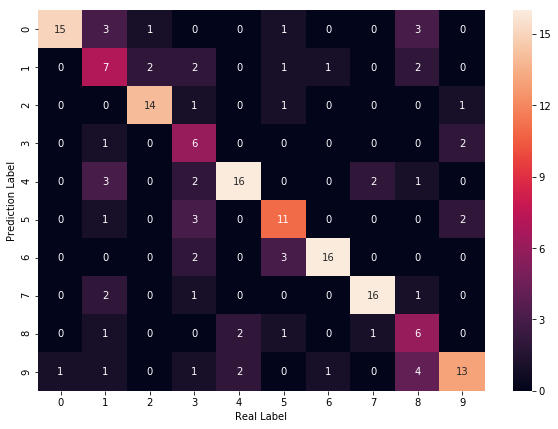

In [16]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [17]:
n_T = 0
for i in range(180):
    if list_P[i] == digits.target[1617+i]:
        n_T += 1
print("Accuracy:{}".format(n_T/180))

Accuracy:0.6666666666666666


In [18]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:313 Total connections::848
